# Note that plots are incorrectly named, as I re-ran each cell on 1000 accounts to make sure the code still worked

In [2]:
import pandas as pd 
import numpy as np
import math
from datetime import datetime
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

# Loading full sender/receiver data 

In [3]:
import joblib
start_time = datetime.now()
all_senders = joblib.load('sender_data')
print(datetime.now() - start_time)

0:01:52.428747


In [4]:
start_time = datetime.now()
all_receivers = joblib.load('receiver_data')
print(datetime.now() - start_time)

0:01:39.318893


# MDS on Subset of sender accounts

In [5]:
accounts = all_senders.T
accounts.rename(columns={'transacton_std_dev': 'transaction_std_dev'}, inplace=True)
accounts.head()

,amounts,locations,receivers,senderISP,time_stamps,transactions,mean_transaction_amount,transaction_std_dev,total_ISPs,mean_trans_times,trans_times_std,transaction_frequency,distance_from_border,unique_receivers,night_time,major_city
044f9d391a27b59859fb3b274237671ff246bb9b69ae7d66db3a7a3875b9520d,"[500.0, 250.0, 2000.0, 1500.0, 100.0, 50.0, 90...","[(44.53, -78.75), (43.58, -79.63), (32.84, -80...",{'2fe5ce59f8fbac0fccaca974b9bb08ab4b2afe3d5703...,"[Cable Cable, Virgin Mobile, AT&T Services]","[2018-06-01 19:02:54.026-0400, 2018-02-28 23:0...",13,584.615,159.732,3,24.7563,20.1415,0.0403937,1.1875,3,1,0.11
3ec92838d15518ea50355e7adfa01d470a7e49479c426db3ffc65befe6a2e622,"[2571.0, 90.0, 2571.0, 2571.0, 2571.0, 150.0, ...","[(43.89, -78.88), (43.74, -79.59), (43.51, -79...",{'480e4ce89838a108880a7ba13475d9aa92e995476a86...,"[Primus Telecommunications Canada, Bell Canada...","[2018-06-01 05:37:11.480-0400, 2018-03-01 09:4...",16,1291.38,287.12,3,16.9869,15.5028,0.0588691,0.59976,8,1,0.24
0f772a1e33aec1998c7a917e5cf67f30eeb485db693c57da470cf67d340c2453,"[1025.0, 1025.0, 1025.0, 1025.0, 1025.0, 500.0...","[(45.73, -73.71), (44.31, -78.36), (43.66, -79...",{'02fc4c55153e0f1645e8c3b24a0d225aa09a3e6806a6...,"[Bell Canada, Cogeco Cable, GONET, Bell Mobility]","[2018-06-01 00:44:01.691-0400, 2018-04-30 10:5...",14,675.214,114.422,4,19.6256,10.2791,0.0509539,0.36142,4,1,0.23
30e1bb678ca1426e122bdb953a2320abbacd14a1dd093b77a4b2f33d84fc937e,"[1510.0, 800.0, 40.0, 1510.0]","[(43.65, -79.42), (43.71, -79.39)]",{'7e28bb7504342ed3806218195ab31d7dcab330cc7511...,"[Amanah Tech, Bell Canada]","[2018-06-01 00:33:22.304-0400, 2018-06-01 00:3...",4,965,303.819,2,23.2123,31.3969,0.0430806,0.57684,2,3,0
5f1331872f036401287146d98e5b7f9d23a24a789b4d72c3731dcabfc67bbc48,"[69.0, 469.0, 69.0, 69.0, 473.0, 69.0, 69.0, 5...","[(45.55, -73.58), (45.38, -71.93), (45.64, -73...",{'42ad4701060ceaebd11b09360ca9a24d75d217f90921...,"[Distributel Communications, Bell Canada]","[2018-06-01 19:27:57.245-0400, 2017-12-01 06:1...",13,160.769,52.6085,2,19.9563,12.2087,0.0501095,0.12916,5,4,0.05


In [6]:
print(accounts.shape)

(1173094, 16)


In [7]:
from sklearn.manifold import MDS
import time

(1000, 10)
25.5579354763031


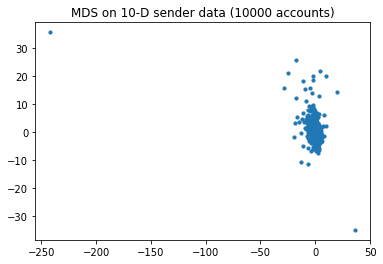

In [8]:
# 22+ minutes to run on 10k (same for receivers) using 300 iter

data10D = accounts[["transactions", "mean_transaction_amount", "transaction_std_dev", "mean_trans_times", "trans_times_std", "total_ISPs", "distance_from_border", "unique_receivers", "night_time", "major_city"]]
data10D_scaled = sklearn.preprocessing.scale(data10D)

# get subset of accounts:
data10D_scaled = data10D_scaled[:1000, :]

print(data10D_scaled.shape)


# running MDS to transform 10D data to 2D
# takes about 130 seconds with 3000 points, 4 initializations (default), max_iter = 300 (default), n_jobs=-1 (use all processors)
s = time.time()
mds_2D = MDS(n_components=2, dissimilarity='euclidean', n_init=4, n_jobs=-1, max_iter=100).fit_transform(data10D_scaled)
print(time.time() - s)


# plotting
fig, ax = plt.subplots()
ax.scatter(mds_2D[:,0], mds_2D[:,1],s=10)
plt.title("MDS on 10-D sender data (10000 accounts)")
plt.show()

(15, 2)


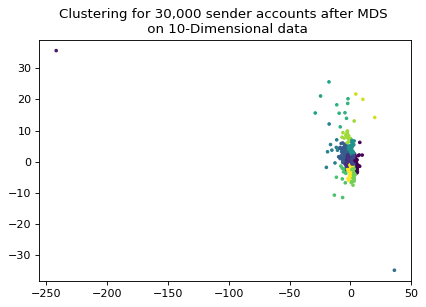

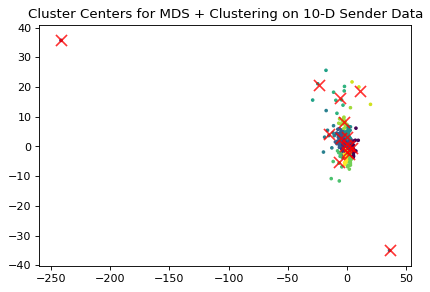

In [9]:
# run clustering on the now 2D data
num_clusters = 15

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(mds_2D)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(np.shape(centers))


center_x = [] 
center_y = []

    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
fig = plt.figure(figsize=(6,4),dpi=80, facecolor='w', edgecolor='k')
    
plt.scatter(mds_2D[:,0], mds_2D[:,1], c=labels.astype(float), s=5)

plt.title("Clustering for 30,000 sender accounts after MDS \n on 10-Dimensional data")

plt.show()


fig = plt.figure(figsize=(6,4),dpi=80, facecolor='w', edgecolor='k')

plt.scatter(mds_2D[:,0], mds_2D[:,1], c=labels.astype(float), s=5)
plt.scatter(center_x,center_y, marker="x",s=100, color="r", alpha=0.8)

plt.title("Cluster Centers for MDS + Clustering on 10-D Sender Data")

plt.show()

# MDS on Subset of receiver emails

In [12]:
emails = all_receivers.T
# TODO: get subset of 10,000 accounts
emails.rename(columns={'transacton_std_dev': 'transaction_std_dev'}, inplace=True)
emails.head()

,amounts,senders,time_stamps,transactions,mean_transaction_amount,transaction_std_dev,transaction_frequency,unique_senders,night_time,mean_trans_times,trans_times_std
2fe5ce59f8fbac0fccaca974b9bb08ab4b2afe3d5703d110a400db4053f82f74,[500.0],{'044f9d391a27b59859fb3b274237671ff246bb9b69ae...,[2018-06-01 19:02:54.026-0400],1,500,0,0,1,0,0,0
480e4ce89838a108880a7ba13475d9aa92e995476a86ea093ec85ba9561bff19,"[2571.0, 2571.0, 2571.0, 2571.0, 2571.0, 2571....",{'3ec92838d15518ea50355e7adfa01d470a7e49479c42...,"[2018-06-01 05:37:11.480-0400, 2018-03-01 09:4...",7,2571,0,0.0403514,1,1,24.7823,10.061
02fc4c55153e0f1645e8c3b24a0d225aa09a3e6806a6523e023b951f8ccd424f,"[1025.0, 1025.0, 1025.0, 1025.0, 1025.0, 500.0...",{'0f772a1e33aec1998c7a917e5cf67f30eeb485db693c...,"[2018-06-01 00:44:01.691-0400, 2018-04-30 10:5...",10,922.5,64.8508,0.0373665,1,1,26.7619,9.50867
7e28bb7504342ed3806218195ab31d7dcab330cc7511ad7e99470d35faf27097,"[1510.0, 1510.0]",{'30e1bb678ca1426e122bdb953a2320abbacd14a1dd09...,"[2018-06-01 00:33:22.304-0400, 2018-03-23 09:1...",2,1510,0,0.0143604,1,1,69.6358,0
42ad4701060ceaebd11b09360ca9a24d75d217f90921deecae5fe2238750f76c,"[69.0, 469.0, 69.0, 69.0, 473.0, 69.0, 69.0, 6...",{'5f1331872f036401287146d98e5b7f9d23a24a789b4d...,"[2018-06-01 19:27:57.245-0400, 2017-12-01 06:1...",9,213.889,68.8782,0.0334063,1,4,29.9345,2.3085


(1000, 7)
0:00:23.759212


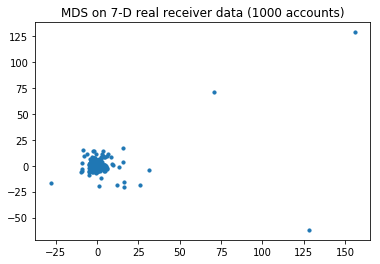

In [13]:
data7D = emails[["transactions", "mean_transaction_amount", "transaction_std_dev", "mean_trans_times", "trans_times_std",  "unique_senders", "night_time"]]
data7D_scaled = sklearn.preprocessing.scale(data7D)

# TODO: remove this line:
data7D_scaled = data7D_scaled[:1000, :]

print(data7D_scaled.shape)


# running MDS to transform 10D data to 2D
# takes about 130 seconds with 3000 points, 4 initializations (default), max_iter = 300 (default), n_jobs=-1 (use all processors)
s = datetime.now()
receivers_2D = MDS(n_components=2, dissimilarity='euclidean', n_init=4, n_jobs=-1, max_iter=100).fit_transform(data7D_scaled)
print(datetime.now() - s)


# plotting
fig, ax = plt.subplots()
ax.scatter(receivers_2D[:,0], receivers_2D[:,1],s=10)
plt.title("MDS on 7-D real receiver data (1000 accounts)")
plt.show()

(10, 2)


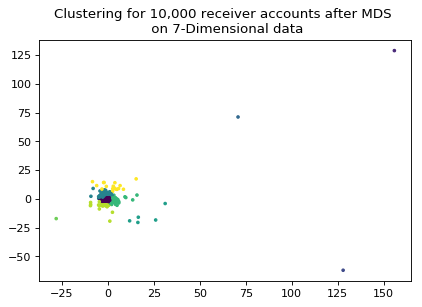

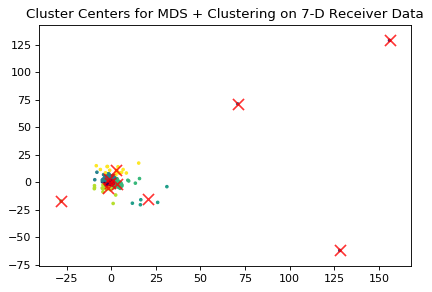

In [14]:
# run clustering on the now 2D data
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(receivers_2D)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(np.shape(centers))


center_x = [] 
center_y = []

    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
fig = plt.figure(figsize=(6,4),dpi=80, facecolor='w', edgecolor='k')
    
plt.scatter(receivers_2D[:,0], receivers_2D[:,1], c=labels.astype(float), s=5)

plt.title("Clustering for 10,000 receiver accounts after MDS \n on 7-Dimensional data")

plt.show()

fig = plt.figure(figsize=(6,4),dpi=80, facecolor='w', edgecolor='k')

plt.scatter(receivers_2D[:,0], receivers_2D[:,1], c=labels.astype(float), s=5)
plt.scatter(center_x,center_y, marker="x",s=100, color="r", alpha=0.8)

plt.title("Cluster Centers for MDS + Clustering on 7-D Receiver Data")

plt.show()

# 2D Plots Coloured according to clustering in 10 Dimensions

(15, 10)


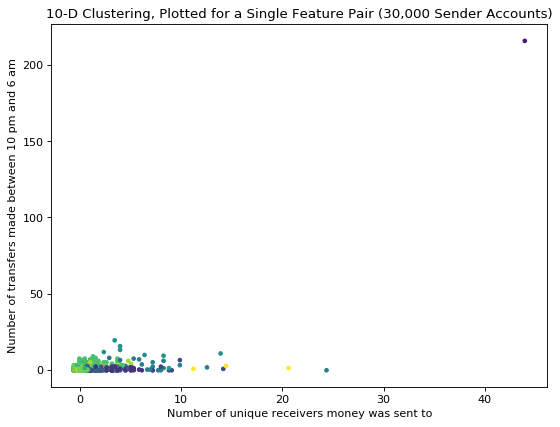

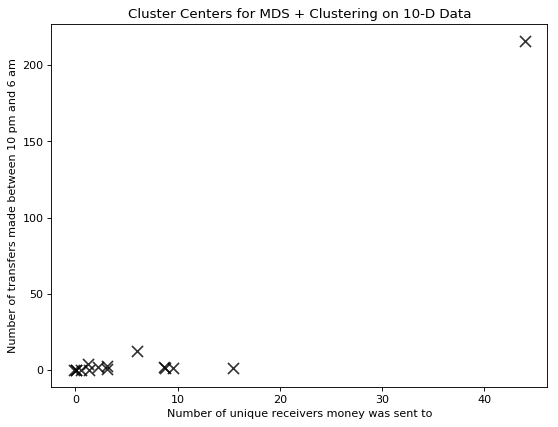

In [16]:
# run clustering on the 10D data, but plot only 2 features
num_clusters = 15

# feature indices
i = 7
j = 8



kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data10D_scaled)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(np.shape(centers))


center_x = [] 
center_y = []

    
for point in centers: 
    center_x.append(point[i])
    center_y.append(point[j])
    
fig = plt.figure(figsize=(8,6),dpi=80, facecolor='w', edgecolor='k')
    
plt.scatter(data10D_scaled[:,i], data10D_scaled[:,j], c=labels.astype(float), s=10)

plt.title("10-D Clustering, Plotted for a Single Feature Pair (30,000 Sender Accounts)")
plt.xlabel("Number of unique receivers money was sent to")
plt.ylabel("Number of transfers made between 10 pm and 6 am")

plt.show()

fig = plt.figure(figsize=(8,6),dpi=80, facecolor='w', edgecolor='k')


plt.scatter(center_x,center_y, marker="x",s=100, color="black", alpha=0.8)

plt.title("Cluster Centers for MDS + Clustering on 10-D Data")
plt.xlabel("Number of unique receivers money was sent to")
plt.ylabel("Number of transfers made between 10 pm and 6 am")

plt.show()